In [58]:
import pandas as pd
import os
from datetime import datetime
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

raw = pd.read_csv("./rawfiles/CARD_SUBWAY_MONTH_202301.CSV")
raw.head()

from matplotlib import font_manager, rc
import platform
# 한글 폰트 사용
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

In [63]:
raw = pd.DataFrame()
files = os.listdir("./rawfiles/")

for file in sorted(files):
    filePath = "./rawfiles/" + file
    tmp = pd.read_csv(filePath)
    raw = pd.concat([raw, tmp], ignore_index=True)
raw = raw.drop(labels=[raw.columns[-1]], axis=1)
raw.info()
raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91647 entries, 0 to 91646
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    91647 non-null  int64 
 1   노선명     91647 non-null  object
 2   역명      91647 non-null  object
 3   승차총승객수  91647 non-null  int64 
 4   하차총승객수  91647 non-null  int64 
 5   등록일자    91647 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.2+ MB


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20230101,경강선,곤지암,1450,1539,20230104
1,20230101,2호선,신도림,20210,21037,20230104
2,20230101,2호선,문래,5995,6567,20230104
3,20230101,2호선,영등포구청,5629,6117,20230104
4,20230101,2호선,당산,6821,7594,20230104
...,...,...,...,...,...,...
91642,20230531,2호선,봉천,26698,25052,20230603
91643,20230531,2호선,서울대입구(관악구청),51435,50092,20230603
91644,20230531,2호선,낙성대(강감찬),30181,29309,20230603
91645,20230531,2호선,사당,41501,45490,20230603


In [64]:
date = datetime.strptime("20230601", "%Y%m%d")
date.weekday()  # 월요일부터 시작

3

In [65]:
weekday = ["월", "화", "수", "목", "금", "토", "일"]
weekdayList = []

for dateStr in raw["사용일자"]:
    date = datetime.strptime(str(dateStr), "%Y%m%d")
    weekdayIndex = date.weekday()
    day = weekday[weekdayIndex]
    weekdayList.append(day)
raw

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20230101,경강선,곤지암,1450,1539,20230104
1,20230101,2호선,신도림,20210,21037,20230104
2,20230101,2호선,문래,5995,6567,20230104
3,20230101,2호선,영등포구청,5629,6117,20230104
4,20230101,2호선,당산,6821,7594,20230104
...,...,...,...,...,...,...
91642,20230531,2호선,봉천,26698,25052,20230603
91643,20230531,2호선,서울대입구(관악구청),51435,50092,20230603
91644,20230531,2호선,낙성대(강감찬),30181,29309,20230603
91645,20230531,2호선,사당,41501,45490,20230603


In [66]:
raw["요일"] = weekdayList
raw.sample(5)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
4031,20230107,경원선,회룡,9639,9393,20230110,토
78106,20230509,경인선,동인천,15779,14853,20230512,화
76738,20230507,7호선,논현,5827,6222,20230510,일
3722,20230107,3호선,녹번,10735,8898,20230110,토
14771,20230125,경원선,덕계,2962,2612,20230128,수


In [8]:
raw.to_excel("./subway_raw.xlsx", index=False)

In [16]:
raw = pd.read_excel("./subway_raw.xlsx")
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,20230101,경강선,곤지암,1450,1539,20230104,일
1,20230101,2호선,신도림,20210,21037,20230104,일
2,20230101,2호선,문래,5995,6567,20230104,일
3,20230101,2호선,영등포구청,5629,6117,20230104,일
4,20230101,2호선,당산,6821,7594,20230104,일


In [67]:
pd.pivot_table(raw, index=["사용일자", "요일"], values="승차총승객수", aggfunc="sum")

,,승차총승객수
사용일자,요일,
20230101,일,3144996
20230102,월,6592083
20230103,화,6905276
20230104,수,7049174
20230105,목,7124981
...,...,...
20230527,토,5070733
20230528,일,3858117
20230529,월,4488949


In [36]:
df1.sort_values(by = '승차총승객수', ascending=False)

In [68]:
raw["연월"] = raw["사용일자"].apply(lambda x : str(x)[:6])
raw["월일"] = raw["사용일자"].apply(lambda x : str(x)[4:])
raw

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,20230101,경강선,곤지암,1450,1539,20230104,일,202301,0101
1,20230101,2호선,신도림,20210,21037,20230104,일,202301,0101
2,20230101,2호선,문래,5995,6567,20230104,일,202301,0101
3,20230101,2호선,영등포구청,5629,6117,20230104,일,202301,0101
4,20230101,2호선,당산,6821,7594,20230104,일,202301,0101
...,...,...,...,...,...,...,...,...,...
91642,20230531,2호선,봉천,26698,25052,20230603,수,202305,0531
91643,20230531,2호선,서울대입구(관악구청),51435,50092,20230603,수,202305,0531
91644,20230531,2호선,낙성대(강감찬),30181,29309,20230603,수,202305,0531
91645,20230531,2호선,사당,41501,45490,20230603,수,202305,0531


In [69]:
data_month = pd.pivot_table(raw, index = '연월', values='승차총승객수', aggfunc='sum')
data_month = data_month.sort_values(by="승차총승객수", ascending=False)
data_month

,승차총승객수
연월,
202303,218193497
202305,213479343
202304,208215531
202302,187676958
202301,183790279


In [70]:
dfSelected = raw[raw["연월"]=="202301"]
dfSelected

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,20230101,경강선,곤지암,1450,1539,20230104,일,202301,0101
1,20230101,2호선,신도림,20210,21037,20230104,일,202301,0101
2,20230101,2호선,문래,5995,6567,20230104,일,202301,0101
3,20230101,2호선,영등포구청,5629,6117,20230104,일,202301,0101
4,20230101,2호선,당산,6821,7594,20230104,일,202301,0101
...,...,...,...,...,...,...,...,...,...
18792,20230131,경원선,소요산,2244,1929,20230203,화,202301,0131
18793,20230131,경원선,동두천,1988,2188,20230203,화,202301,0131
18794,20230131,경원선,보산,1391,1299,20230203,화,202301,0131
18795,20230131,경원선,동두천중앙,3046,2954,20230203,화,202301,0131


In [71]:
dfPivot = pd.pivot_table(dfSelected, index=["월일", "요일"], values="승차총승객수", aggfunc="sum").reset_index()
dfPivot.head()

,월일,요일,승차총승객수
0,0101,일,3144996
1,0102,월,6592083
2,0103,화,6905276
3,0104,수,7049174
4,0105,목,7124981


<Axes: xlabel='월일', ylabel='승차총승객수'>

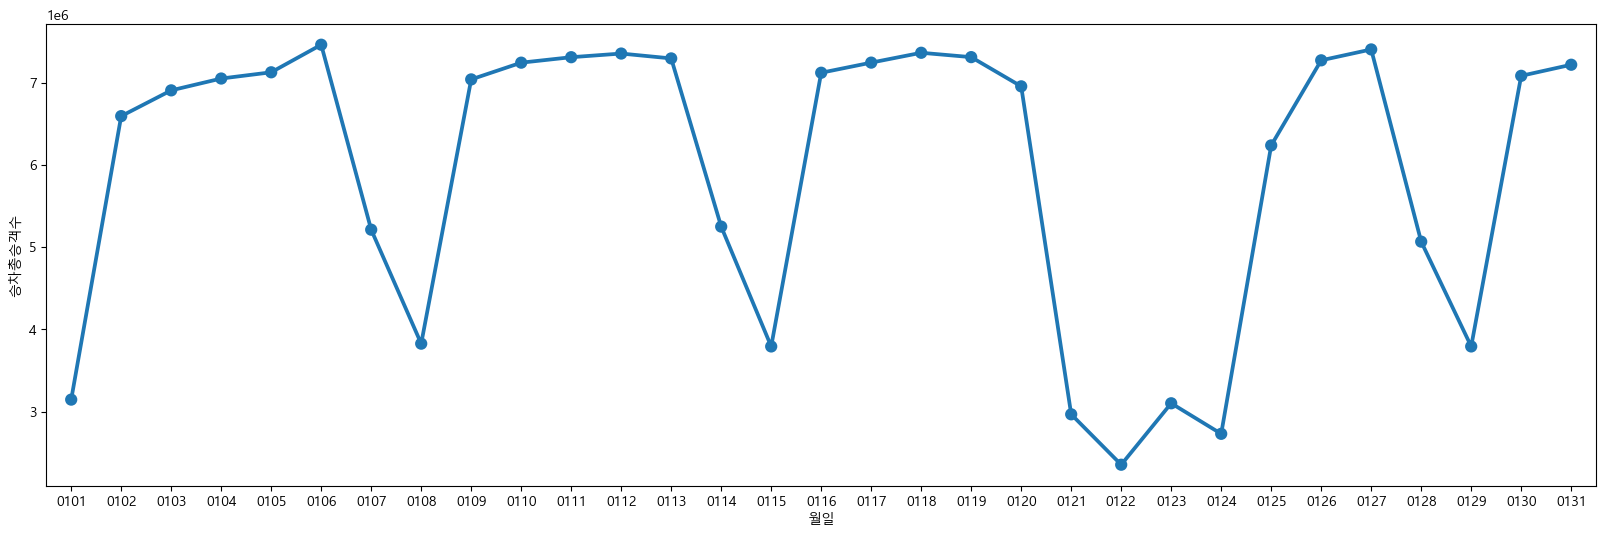

In [72]:
plt.subplots(figsize=(20,6))
sns.pointplot(data=dfPivot, x="월일", y="승차총승객수")

<Axes: xlabel='요일', ylabel='승차총승객수'>

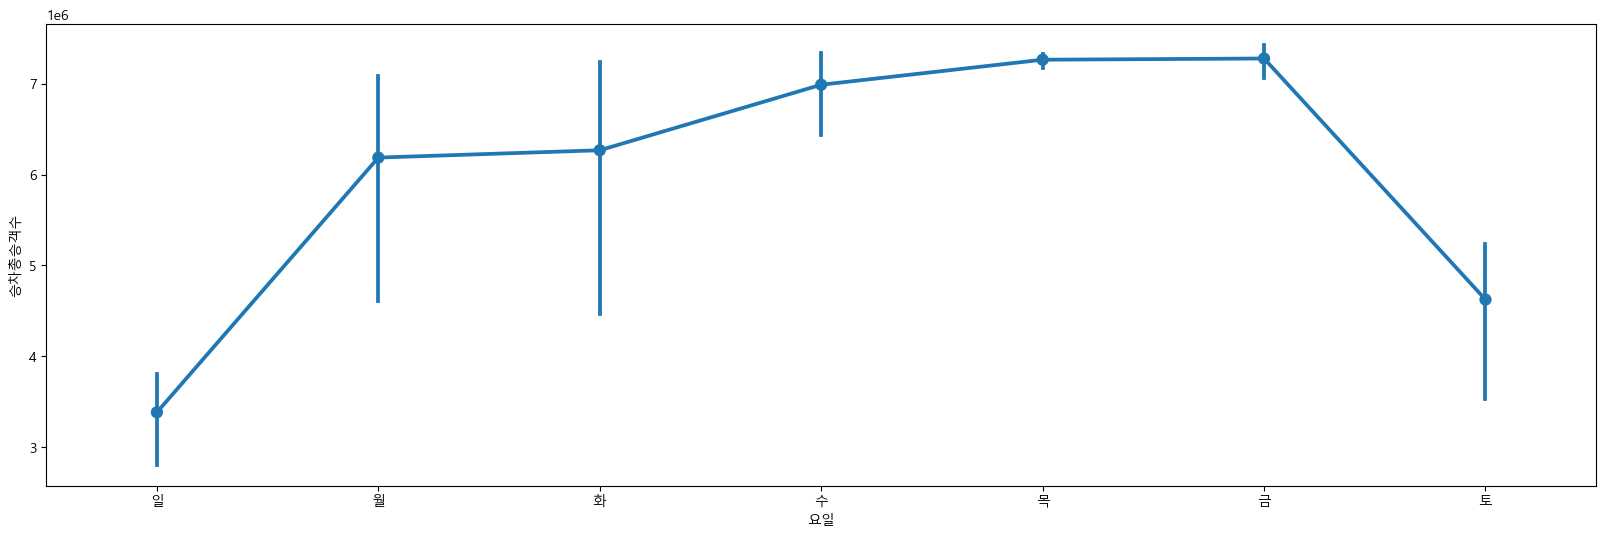

In [73]:
plt.subplots(figsize=(20,6))
sns.pointplot(data=dfPivot, x="요일", y="승차총승객수")

In [74]:
raw["연월"].unique()

array(['202301', '202302', '202303', '202304', '202305'], dtype=object)

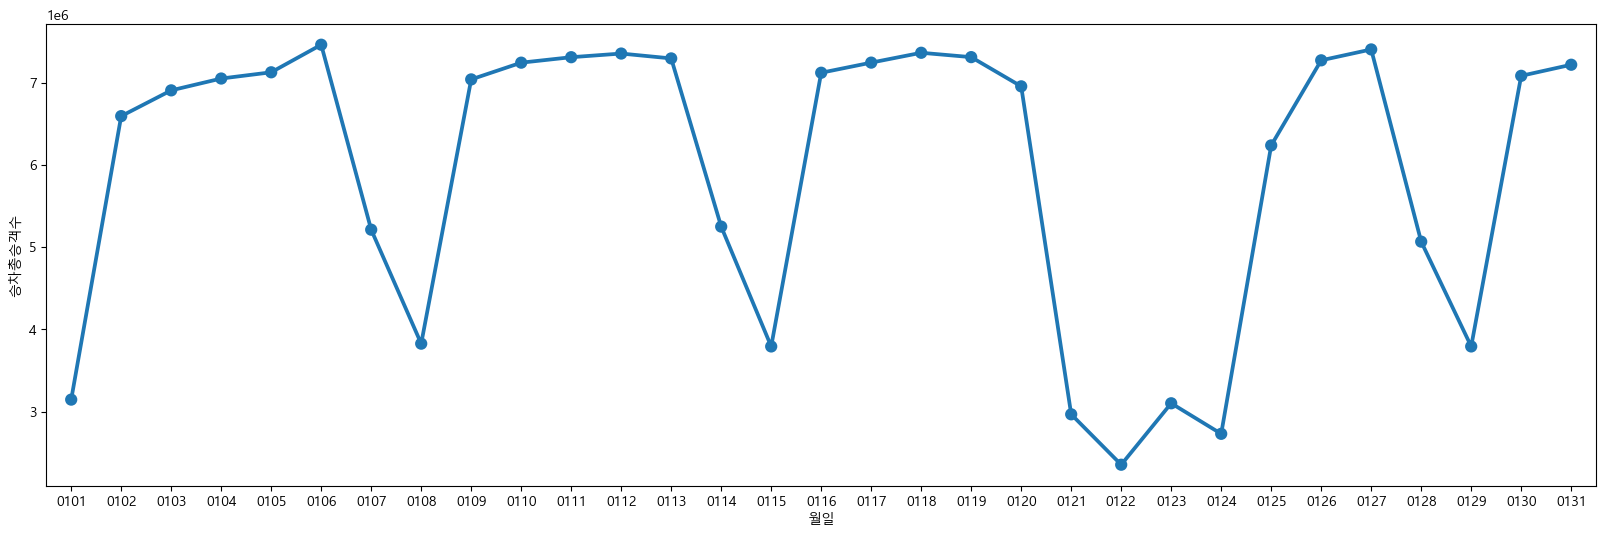

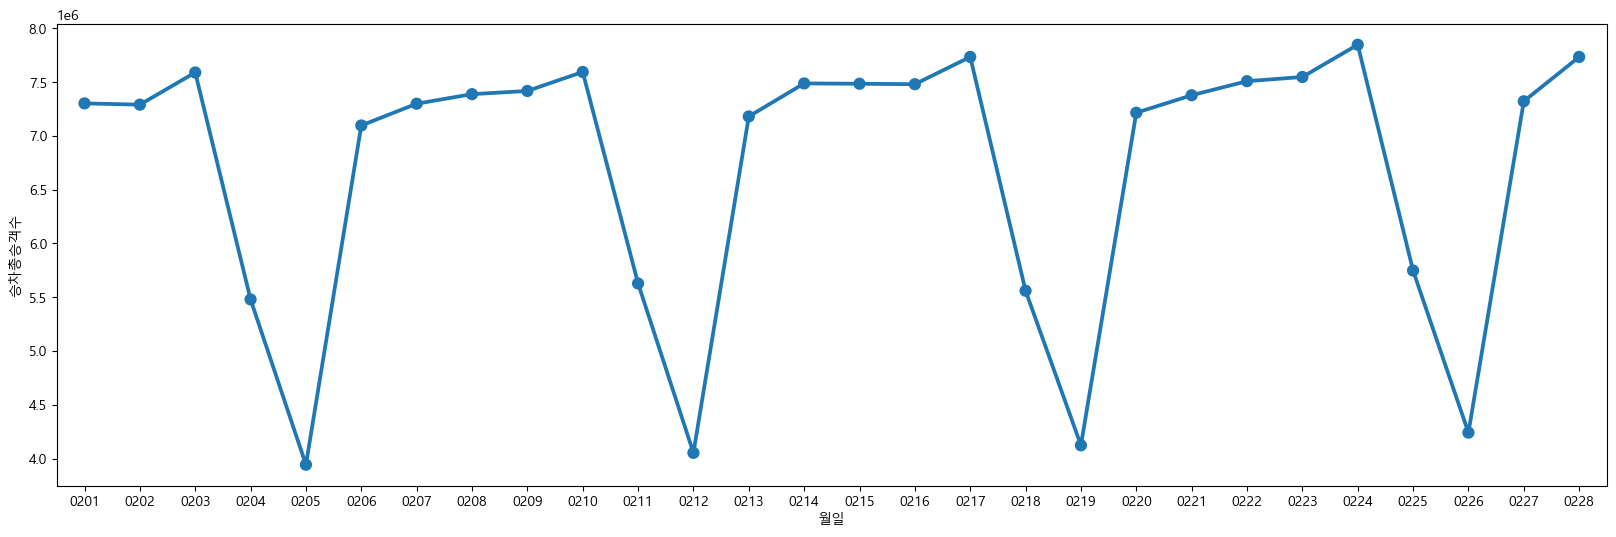

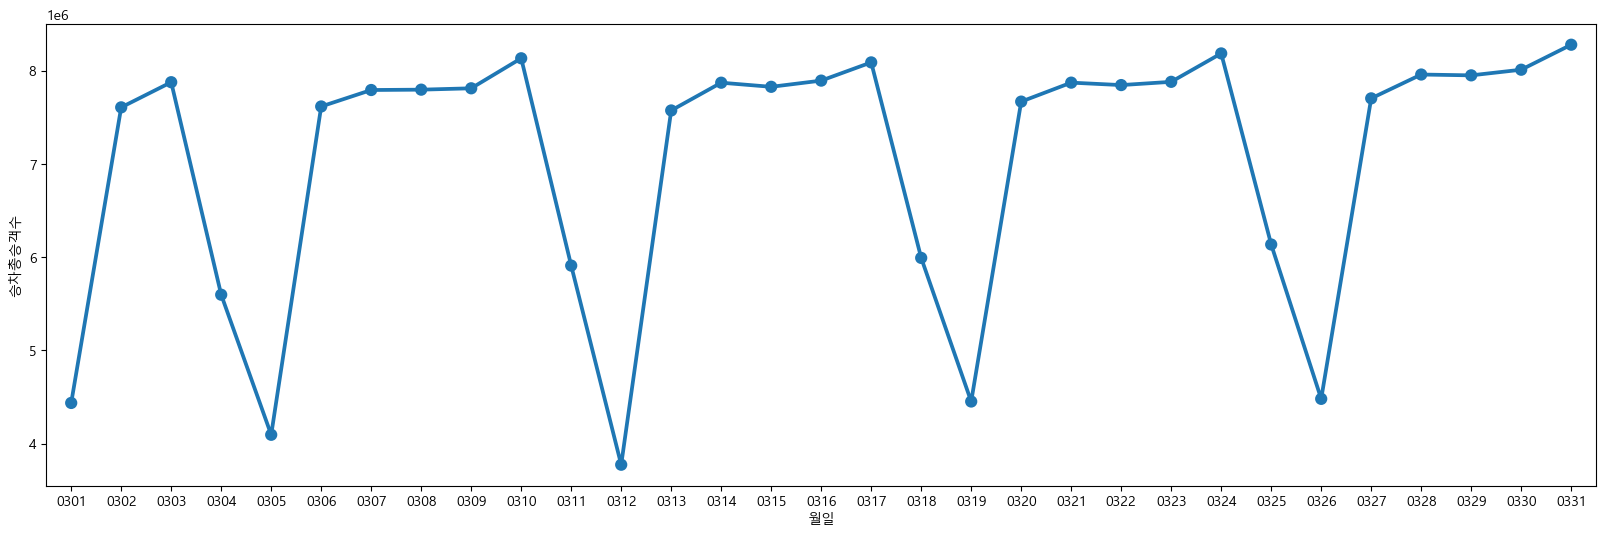

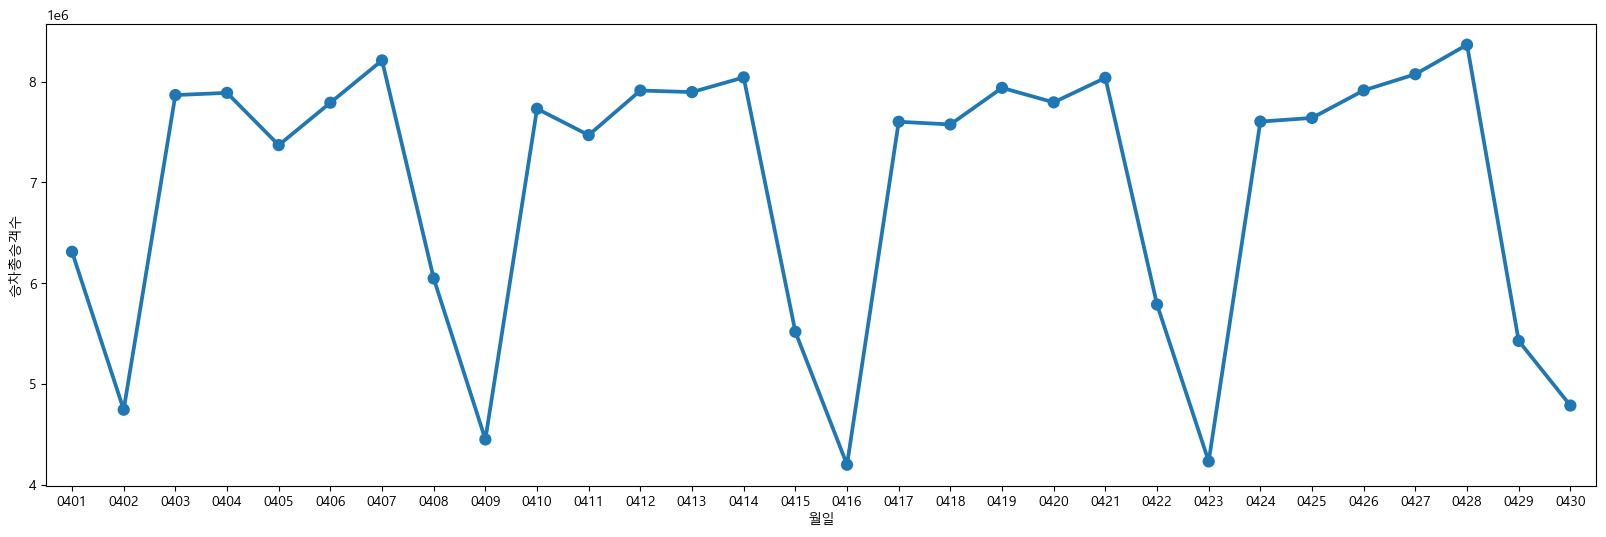

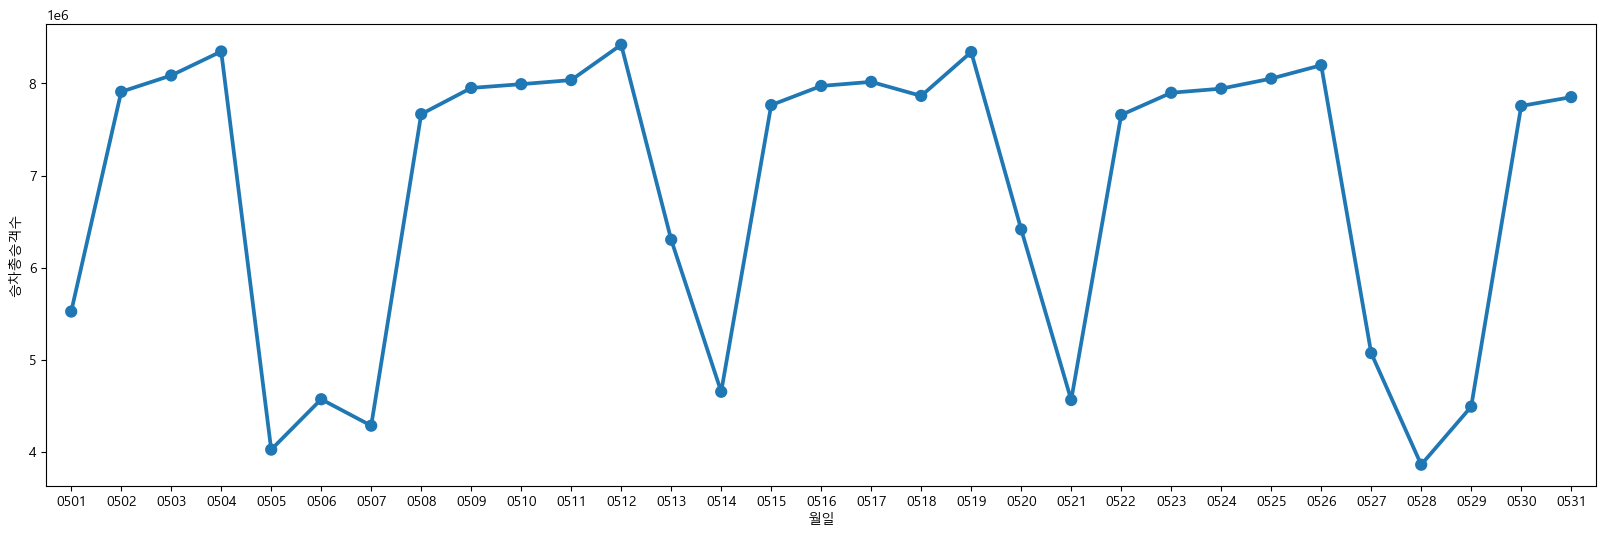

In [75]:
for yearmonth in raw['연월'].unique():
    df_selected = raw[raw['연월']==yearmonth]
    dfPivot = pd.pivot_table(df_selected, index = ['월일','요일'], values= '승차총승객수', aggfunc='sum')
    dfPivot = dfPivot.reset_index()
    plt.subplots(figsize = (20,6))
    sns.pointplot(data = dfPivot, x = '월일', y = '승차총승객수')

In [79]:
dataStation = raw.pivot_table(index=("역명"), values="승차총승객수", aggfunc="sum")
dataStation = dataStation.sort_values(by="승차총승객수", ascending=False)
dataStation.head(10)

,승차총승객수
역명,
잠실(송파구청),13659003
서울역,13067001
홍대입구,12400110
고속터미널,12049673
강남,11390451
사당,9680113
선릉,9261019
신림,8478623
구로디지털단지,8166319


In [81]:
dataStation = raw.pivot_table(index=("역명"), values="하차총승객수", aggfunc="sum")
dataStation = dataStation.sort_values(by="하차총승객수", ascending=False)
dataStation.head(10)

,하차총승객수
역명,
잠실(송파구청),13872727
홍대입구,13080173
서울역,13000232
고속터미널,12005617
강남,11017491
사당,9810559
선릉,9289959
가산디지털단지,8410737
신림,8297085


In [82]:
line = "1호선"
dataLine = raw[raw["노선명"] == line]
dataLine

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
29,20230101,1호선,시청,9282,8253,20230104,일,202301,0101
30,20230101,1호선,서울역,31924,26931,20230104,일,202301,0101
52,20230101,1호선,종각,12964,10739,20230104,일,202301,0101
53,20230101,1호선,종로3가,12847,10749,20230104,일,202301,0101
54,20230101,1호선,종로5가,9827,8974,20230104,일,202301,0101
...,...,...,...,...,...,...,...,...,...
91069,20230531,1호선,동대문,12148,11645,20230603,수,202305,0531
91070,20230531,1호선,종로5가,26082,25610,20230603,수,202305,0531
91071,20230531,1호선,종로3가,28657,25475,20230603,수,202305,0531
91072,20230531,1호선,종각,45069,44091,20230603,수,202305,0531


In [94]:
dfPivot = dataLine.pivot_table(index="역명", columns="요일", values="승차총승객수", aggfunc="sum")
dfPivot = dfPivot[["월", "화", "수", "목", "금", "토", "일"]]
dfPivot
dfPivot = dfPivot/10000

<Axes: title={'center': '1호선 역별/요일별 승객수'}, xlabel='요일', ylabel='역명'>

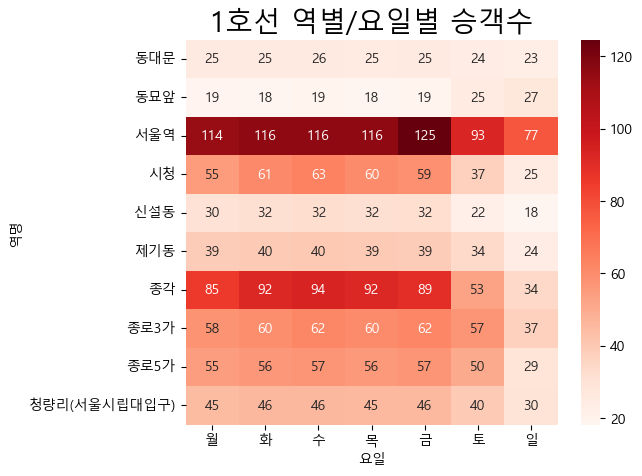

In [95]:
plt.subplots(figsize=(6,5))
plt.title("1호선 역별/요일별 승객수", fontsize=20)
sns.heatmap(dfPivot, cmap="Reds", annot=True, fmt=".0f")

In [98]:
lineSeoulList = raw["노선명"].unique()
lineSeoulList = sorted(lineSeoulList)
lineSeoulList = lineSeoulList[:9]
lineSeoulList

['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선']

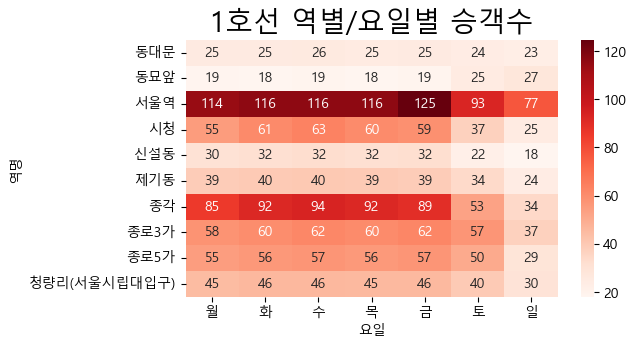

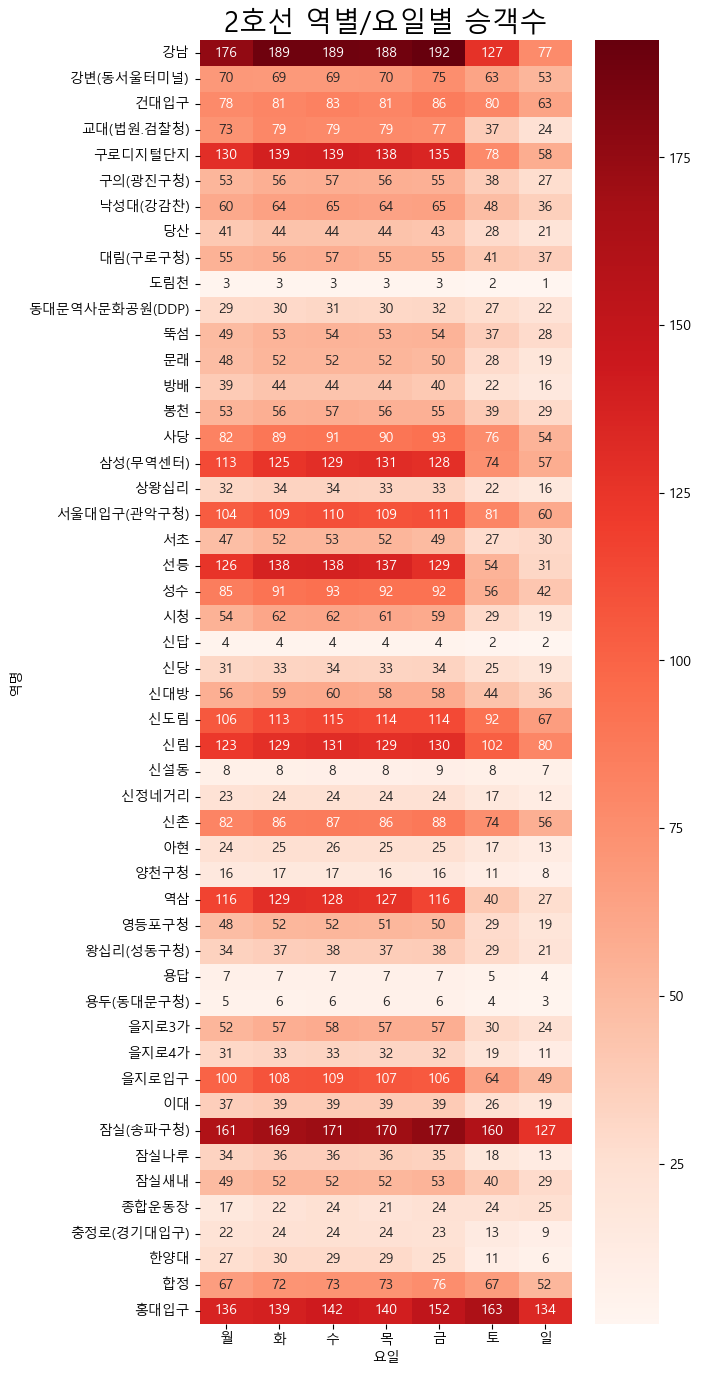

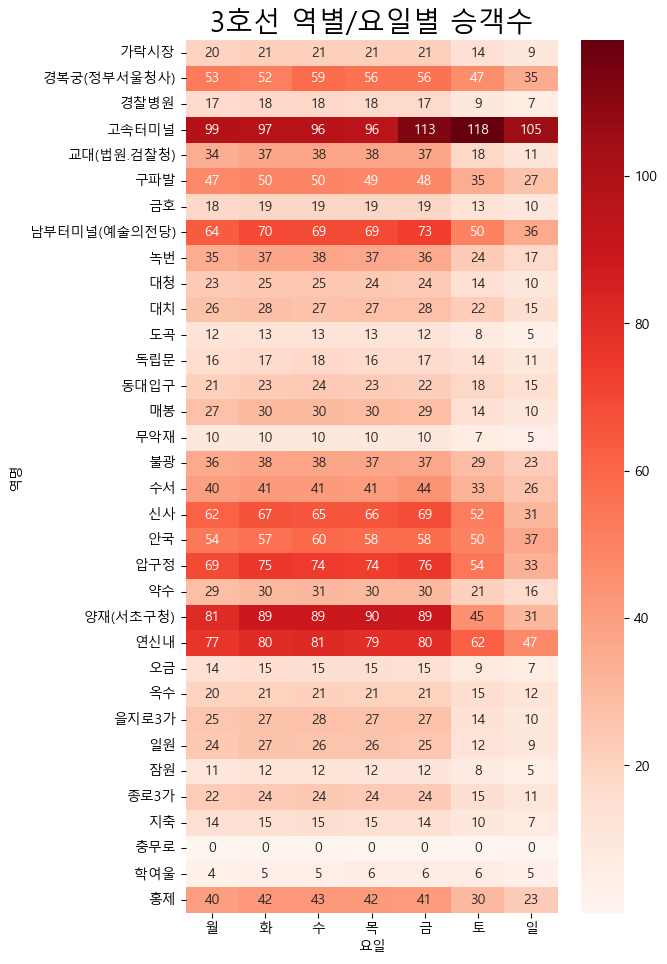

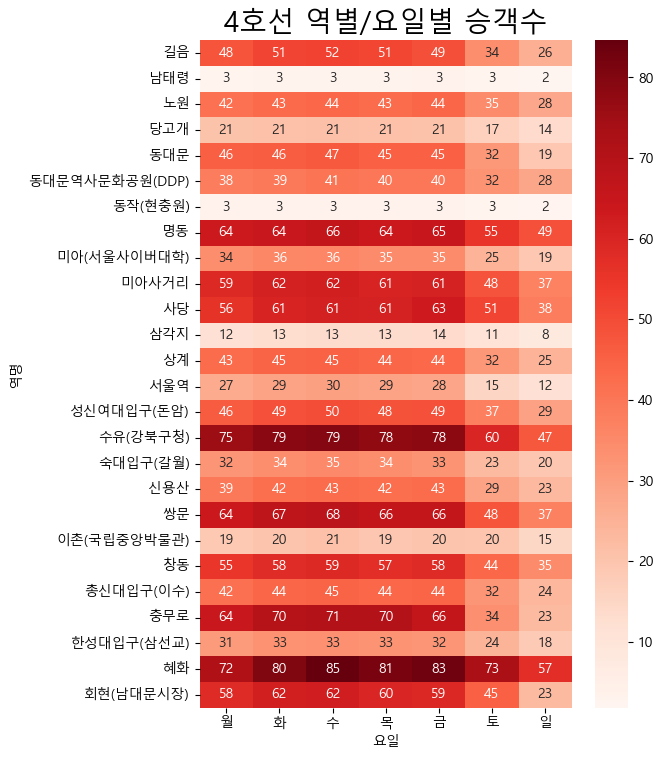

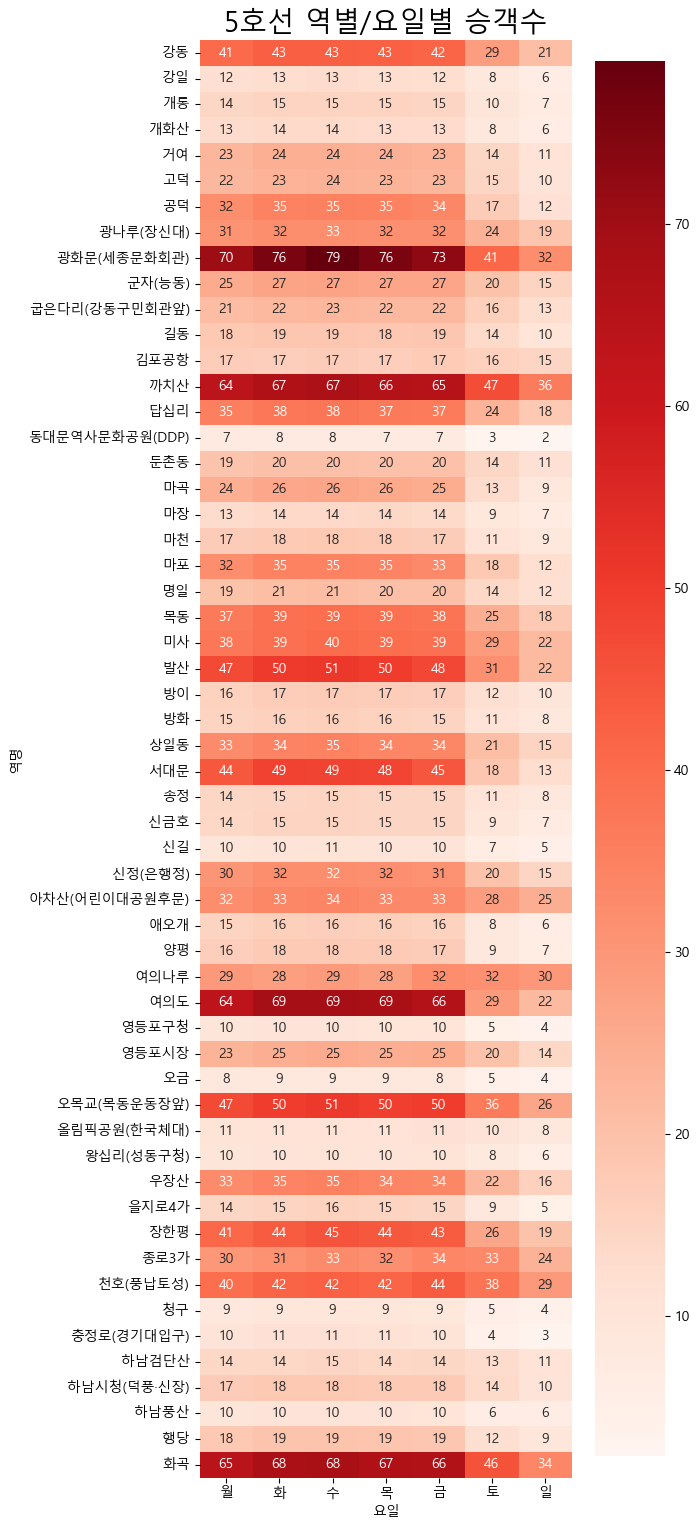

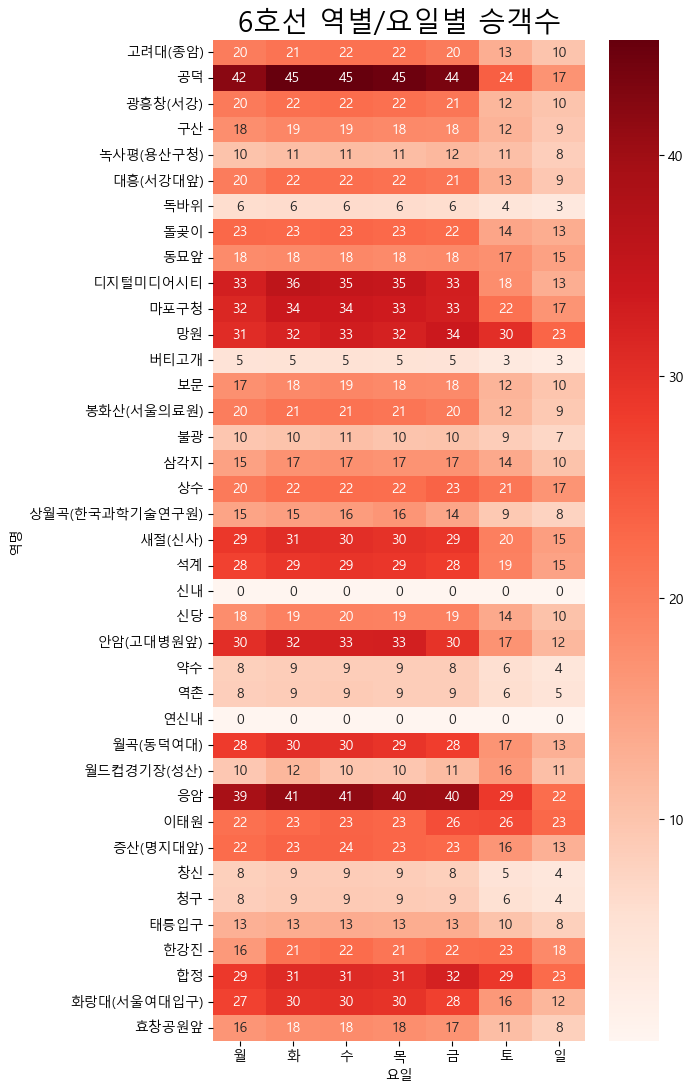

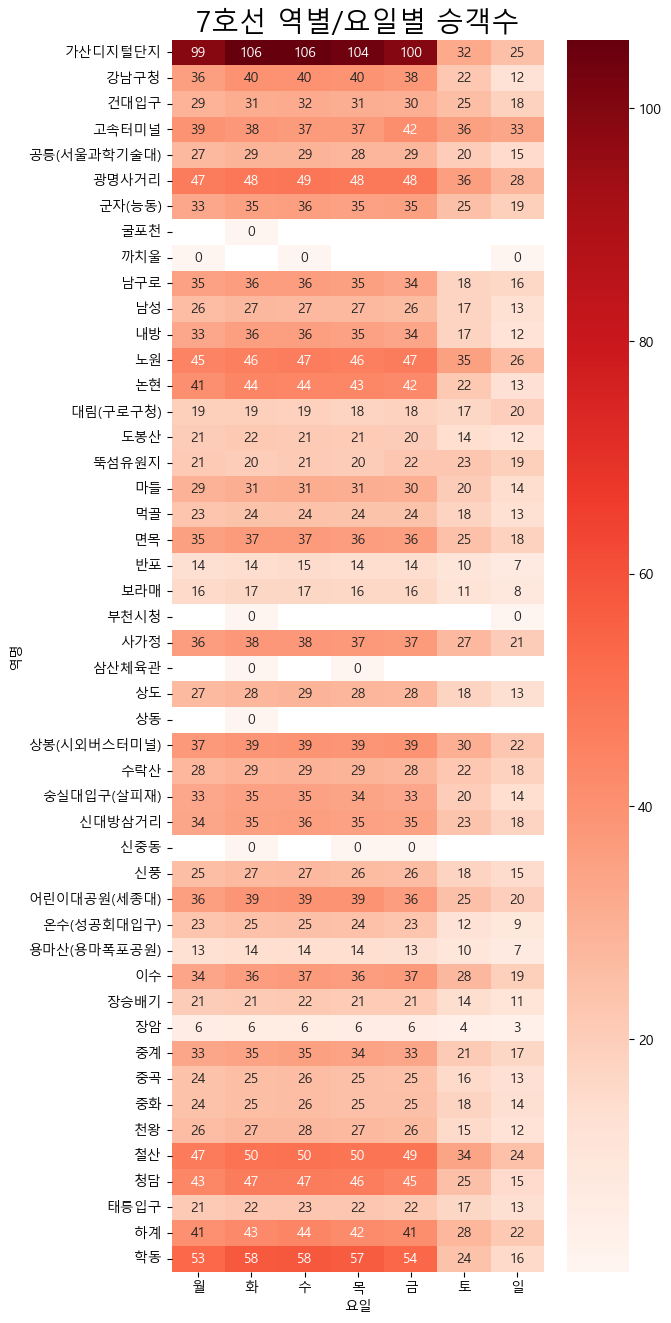

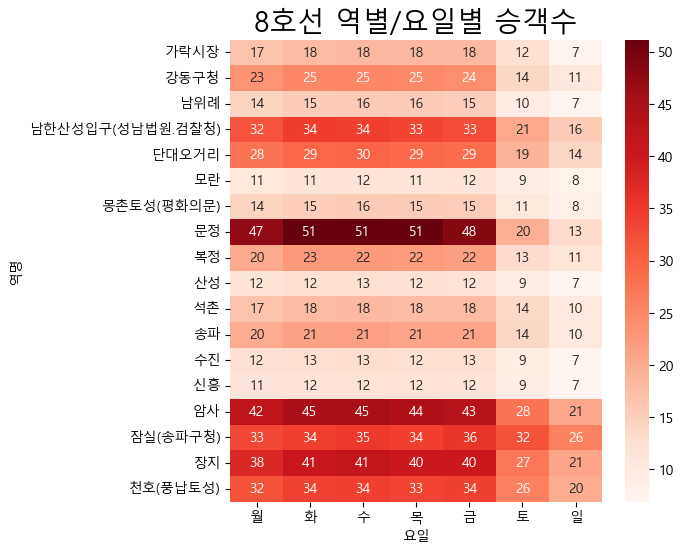

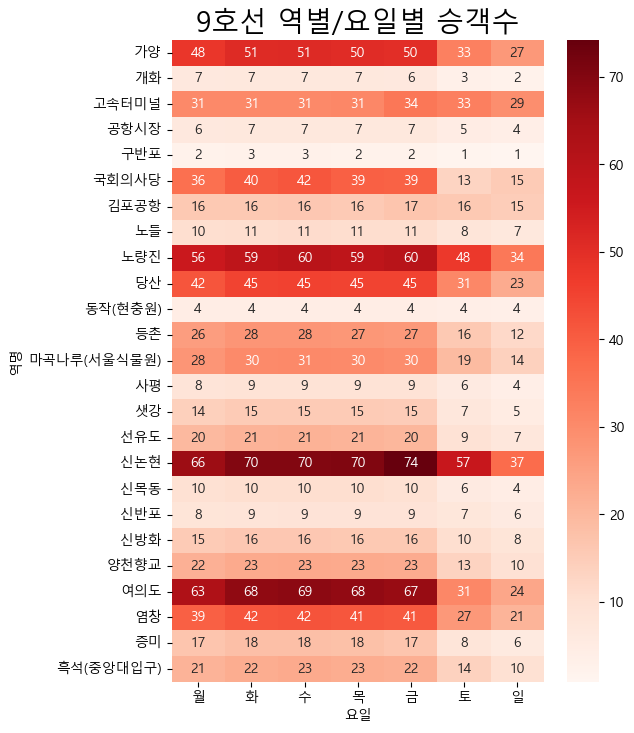

In [101]:
for line in lineSeoulList:
    dataLine = raw[raw["노선명"] == line]
    dfPivot = dataLine.pivot_table(index="역명", columns="요일", values="승차총승객수", aggfunc="sum")
    dfPivot = dfPivot[["월", "화", "수", "목", "금", "토", "일"]]
    dfPivot = dfPivot/10000
    plt.subplots(figsize=(6, len(dfPivot)/3))
    plt.title(line + " 역별/요일별 승객수", fontsize=20)
    sns.heatmap(dfPivot, cmap="Reds", annot=True, fmt=".0f")